<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Read-model-bathymetry-and-grid" data-toc-modified-id="Read-model-bathymetry-and-grid-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Read model bathymetry and grid</a></span></li><li><span><a href="#Plot-Bathy-and-vertical-grid" data-toc-modified-id="Plot-Bathy-and-vertical-grid-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Plot Bathy and vertical grid</a></span></li></ul></div>

In [1]:
import sys
import os
src_path = os.path.abspath(os.path.join(os.getcwd(), '../src'))
sys.path.append(src_path)
import bp12_tools as bp12
import bp12_tools.plot_utils as pu

import numpy as np
import xarray as xr
import cmocean as cmo
from cartopy import crs as ccrs
import matplotlib.pyplot as plt
from matplotlib import gridspec

%matplotlib inline

---

# Figure 1 plot model domain bahymetry and vertical levels

Plot BIOPERIANT12 bathymetry and 46-level vertical grid spacing (both from ORCA12)

## Read model bathymetry and grid

In [2]:
# Get BP12 mask and grid
tmask = bp12.grid_utils.get_bp12grid('tmask',is_sorted=1)
e3t = bp12.grid_utils.get_bp12grid('e3t',is_sorted=1)
zt  = bp12.grid_utils.get_bp12grid('gdept_0',is_sorted=1)

In [3]:
# Get BP12 bathy and apply mask
bathy_model = bp12.chpc_utils.get_bp12input('Bathymetry', \
                                             f"../data/GRID/BIOPERIANT12_bathymetry.nc", \
                                             is_sorted=1)
bathy = bathy_model.where(tmask.isel(deptht=0)==1)

## Plot Bathy and vertical grid

In [4]:
#Get coast and land shapefiles for maps
land_feature, coast_feature = pu.maps.get_cartopy_landcoast()

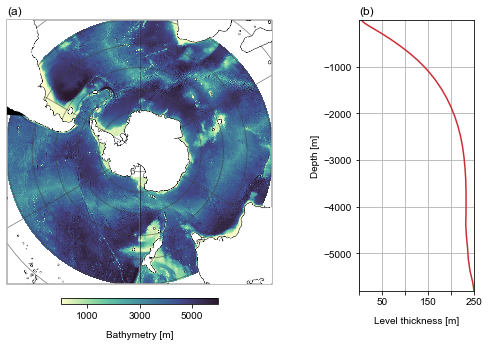

In [5]:
fig, axs = plt.subplots(3, 5, figsize=(12,6))

gs = axs[0, 0].get_subplotspec().get_gridspec()
[a.remove() for i in range(5) for a in axs[:, i]]
    
# PLOT bathy
ax0 = fig.add_subplot(gs[:, :3], projection = ccrs.Stereographic(central_latitude=-90))
im = ax0.pcolormesh(bathy_model.lon, bathy_model.lat, bathy,
                     cmap=cmo.cm.deep,  vmin=0, vmax=6000,
                     transform=ccrs.PlateCarree(),zorder=0)
plt.title('(a)',loc='left',fontsize=12)
cb = plt.colorbar(im, ticks=[1000,3000,5000],orientation='horizontal', shrink=0.4, aspect = 25, pad = 0.04)
cb.set_label('Bathymetry [m]', labelpad=10)
pu.maps.map_decorator(ax0)

# PLOT VERTICAL GRID
e3t_ticks = np.arange(0, 300, 50)
e3t_lbl = ['', '50', '', '150', '', '250']
inner_gs = gridspec.GridSpecFromSubplotSpec(6, 2, subplot_spec=gs[:, 3:])
ax1 = fig.add_subplot(inner_gs[:5,0])
ax1.plot(e3t.mean(('lat','lon')),-1*zt,"#cc2d35")

ax1.set_xlim([0,250])
ax1.set_xticks(e3t_ticks)
ax1.set_xticklabels(e3t_lbl)
ax1.set_xlabel('Level thickness [m]', labelpad=10)
ax1.set_ylim([-5800,0])
ax1.set_yticks(np.arange(-5000, 0, 1000))
ax1.set_ylabel('Depth [m]')
ax1.grid(True)
plt.title("(b)", loc='left',fontsize=12)
ax1.set_rasterized(True)
plt.savefig(f'../figures/f01.png', bbox_inches='tight')

---